In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df=df.iloc[:,1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = MinMaxScaler()
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])

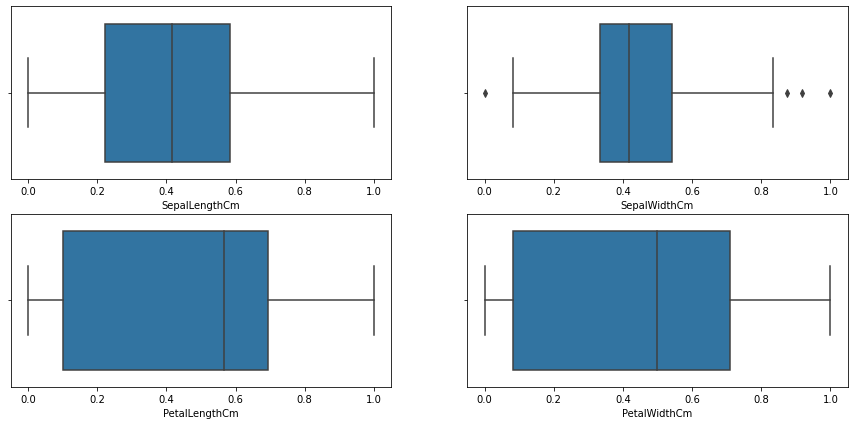

In [13]:

t=1
plt.figure(figsize=(15,7))
for i in cols:
    plt.subplot(2,2,t)
    t=t+1
    sns.boxplot(df[i])
    

In [14]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR

print("Q1 :",round(Q1,2),"\nQ3 :",round(Q3,2),"\nIQR :",round(IQR,2),"\nLower_limit :",round(Lower_limit,2),"\nUpper_limit :",round(Upper_limit,2))

Q1 : 0.33 
Q3 : 0.54 
IQR : 0.21 
Lower_limit : 0.02 
Upper_limit : 0.85


In [15]:
df[(df['SepalWidthCm']<Lower_limit)|(df['SepalWidthCm']>Upper_limit)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,0.388889,1.000000,0.084746,0.125000,Iris-setosa
32,0.250000,0.875000,0.084746,0.000000,Iris-setosa
33,0.333333,0.916667,0.067797,0.041667,Iris-setosa
60,0.194444,0.000000,0.423729,0.375000,Iris-versicolor


In [16]:
df=df[(df['SepalWidthCm']>Lower_limit)&(df['SepalWidthCm']<Upper_limit)]

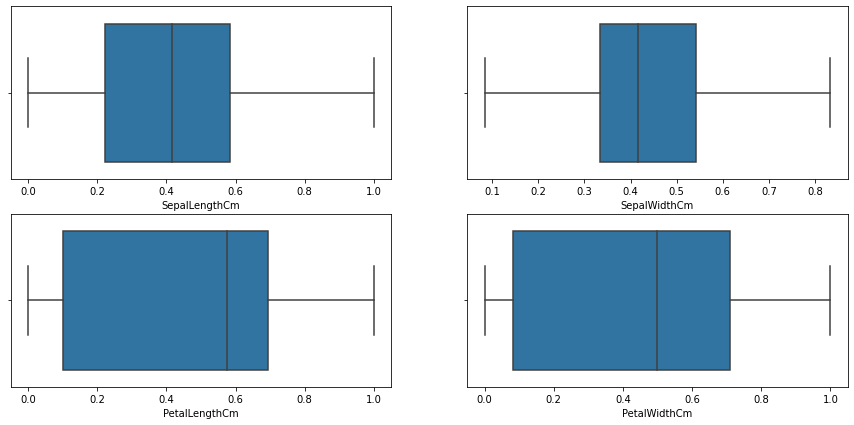

In [17]:
t=1
plt.figure(figsize=(15,7))
for i in cols:
    plt.subplot(2,2,t)
    t=t+1
    sns.boxplot(df[i])

In [18]:
df.shape

(146, 5)

In [19]:
X = df.iloc[:,:4].values
y = df['Species'].values

In [20]:
X[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(44, 4)
(102, 4)
(102,)
(44,)


In [22]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred=NB_model.predict(X_test)

In [23]:
accuracy=NB_model.score(X_test,y_test)
print(round(accuracy,2))

0.95


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 11]])

Let us calculate the TP, TN, FP, FN values for the class Setosa using the Above tricks:<br>
                cell(1)   cell(2)   cell(3)<br>
                cell(4)   cell(5)   cell(6)<br>
                cell(7)   cell(8)   cell(9)<br>

<h4>TP</h4> The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

<h4>FP</h4> The sum of values of corresponding rows except the TP value

FP = (cell 2 + cell3)

= (0 + 0)

= 0

<h4>FN</h4> The sum of values of corresponding column except the TP value.

FN = (cell 4 + cell 7)

= (0 + 0)

= 0

<h4>TN</h4> The sum of values of all columns and row except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)

= 15 + 1 +1 + 11

= 28

In [25]:
print("confusion matrix for setosa")
tp=cm[0][0]
fp=cm[0][1]+cm[0][2]
fn=cm[1][0]+cm[2][0]
tn=cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]
print("Confusion Matrix")
print("TP: ",tp,"\tFP: ",fp)
print("FN: ",fn,"\tTN: ",tn)

print ('\n\nCalculation for setosa')
accuracy=(tp+tn)/(tp+fp+fn+tn)
errorRate=1-accuracy
precision = tp/(tp+fp)
recall=tp/(tp+fn)

print('Accuracy:',round(accuracy,2))
print('Error Rate:',round(errorRate,2))
print('Precision:',round(precision,2))
print('Recall: ',round(recall,2))

confusion matrix for setosa
Confusion Matrix
TP:  16 	FP:  0
FN:  0 	TN:  28


Calculation for setosa
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall:  1.0


In [33]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64

In [35]:
print("confusion matrix for versicolor")
tp1=cm[0][0]
fp1=cm[1][0]+cm[1][2]
fn1=cm[0][1]+cm[2][1]
tn1=cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]
print("Confusion Matrix")
print("TP: ",tp1,"\tFP: ",fp1)
print("FN: ",fn1,"\tTN: ",tn1)

print ('\n\nCalculation for versicolor')
accuracy1=(tp1+tn1)/(tp1+fp1+fn1+tn1)
errorRate1=1-accuracy1
precision1 = tp1/(tp1+fp1)
recall1=tp1/(tp1+fn1)

print('Accuracy:',round(accuracy1,2))
print('Error Rate:',round(errorRate1,2))
print('Precision:',round(precision1,2))
print('Recall: ',round(recall1,2))

confusion matrix for versicolor
Confusion Matrix
TP:  16 	FP:  1
FN:  1 	TN:  27


Calculation for versicolor
Accuracy: 0.96
Error Rate: 0.04
Precision: 0.94
Recall:  0.94


In [34]:
print("confusion matrix for virginica")
tp2=cm[2][2]
fp2=cm[2][0]+cm[2][1]
fn2=cm[0][2]+cm[1][2]
tn2=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
print("Confusion Matrix")
print("TP: ",tp2,"\tFP: ",fp2)
print("FN: ",fn2,"\tTN: ",tn2)

print ('\n\nCalculation for virginica')
accuracy2=(tp2+tn2)/(tp2+fp2+fn2+tn2)
errorRate2=1-accuracy2
precision2 = tp2/(tp2+fp2)
recall2=tp2/(tp2+fn2)

print('Accuracy:',round(accuracy2,2))
print('Error Rate:',round(errorRate2,2))
print('Precision:',round(precision2,2))
print('Recall: ',round(recall2,2))

confusion matrix for virginica
Confusion Matrix
TP:  11 	FP:  1
FN:  1 	TN:  31


Calculation for virginica
Accuracy: 0.95
Error Rate: 0.05
Precision: 0.92
Recall:  0.92


<h4>Micro F1</h4>
This is called micro-averaged F1-score. It is calculated by considering the total TP, total FP and total FN of the model. It does not consider each class individually, It calculates the metrics globally. 

In [38]:
total_tp=tp+tp1+tp2
total_fp=fp+fp1+fp2
total_fn=fn+fn1+fn2
print(total_tp,total_fp,total_fn)
micro_f1_precision=total_tp/(total_tp+total_fp)
micro_f1_recall=total_tp/(total_tp+total_fn)
print(micro_f1_precision,micro_f1_precision)

43 2 2
0.9555555555555556 0.9555555555555556


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        44
      macro avg       0.95      0.95      0.95        44
   weighted avg       0.95      0.95      0.95        44

